# Biased RW for the Compact Direct Percolation

All the theory is presented in the file *notes_from_book.pdf*

### Introduction to the code
This code perfrom an analysis on the probability to exit from a left barrier in a 1D random walk with 2 absorbing barriers.
$p_j$, the quantity we are talking about, is computed as the ratio between the walkers leaving from the left absorbing trap and the total number of walkers.
In the following, we perform a benchmark test and compare results with the theoretical model for different choises of the parameters.

In [5]:
# importing basic tools
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%load_ext line_profiler
%load_ext memory_profiler
%autoreload 2 # for reloading all modules; this allow me to modify biased_rw.py

# Importing my module
import sys, os
sys.path[0] = 'src/'
import biased_rw as brw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


## Benchmark
Some benchmarks relatives to the main functions of the module I wrote

In [2]:
# Profiler
%prun brw.distribution(1,10,0.45,500)

         65213 function calls (65189 primitive calls) in 0.295 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    56894    0.123    0.000    0.123    0.000 {method 'random' of 'numpy.random.mtrand.RandomState' objects}
     4000    0.099    0.000    0.277    0.000 biased_rw.py:5(rw_absorbing)
     4000    0.055    0.000    0.055    0.000 {method 'seed' of 'numpy.random.mtrand.RandomState' objects}
        8    0.013    0.002    0.290    0.036 biased_rw.py:64(<listcomp>)
       32    0.001    0.000    0.001    0.000 {built-in method numpy.array}
        8    0.001    0.000    0.002    0.000 arraysetops.py:298(_unique1d)
       10    0.001    0.000    0.295    0.029 biased_rw.py:43(pj)
        8    0.000    0.000    0.000    0.000 function_base.py:1141(diff)
     32/8    0.000    0.000    0.002    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        8    0.000    0.000    0.000    0.000 {meth

In [3]:
# Profile line-by-line
%lprun -f brw.rw_absorbing brw.distribution(1,10,0.45,500)

Timer unit: 1e-06 s

Total time: 0.300779 s
File: src/biased_rw.py
Function: rw_absorbing at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def rw_absorbing(j,a,b,r,seed):
     6                                               '''
     7                                               Generates a 1D random walk with absorbing 
     8                                               barrier in a and b and returns in which point the walker ended up.
     9                                               
    10                                               j = starting position
    11                                               a = lower bound
    12                                               b = upper bound
    13                                               r = probability to move to the right
    14                                               seed = seed for the RNG
    15                                          

As we can see, most of the time is spent during the random numnber generation. I've tried to implement a non global random number generator using the `np.random.Generetor` class, but maybe I've implemented wrongly. Nevertheless, in this way the code is acceptable.

## Analysis

How does $p_j$ changes with the number of walkers $n$ used?

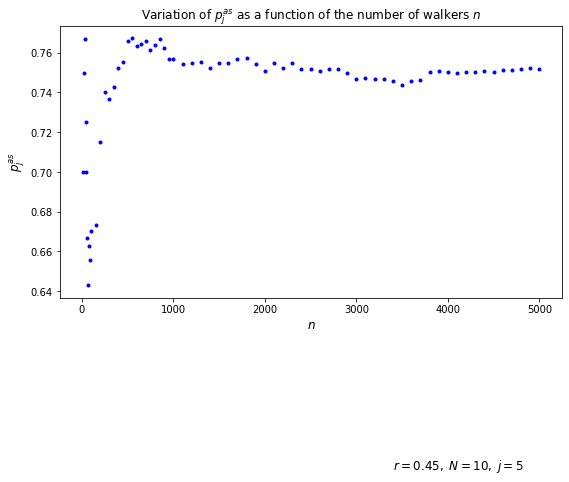

In [10]:
def pj_and_n(save=False):
    n = list(range(10,101,10)) + list(range(150,1001,50)) + list(range(1100,5001,100))
    j=5
    a=1
    b=10
    r=0.45
    P = [brw.pj(j=j,a=a,b=b,r=r,n=w) for w in n] # j and r are fixed

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
    
    s = 12
    ax.plot(n, P, '.', c = 'blue')
    ax.set_title('Variation of $p_j^{as}$ as a function of the number of walkers $n$', fontsize=s)
    ax.set_xlabel('$n$', fontsize=s)
    ax.set_ylabel('$p_j^{as}$', fontsize=s)
    ax.text(3400,0.55,'$r = {}, \; N = {}, \; j = {}$'.format(r,b,j), fontsize=s)
    
    if save == True:
        plt.savefig('saved/pj_and_n', format='pdf')
        
pj_and_n(save=False)

Computation as a function of r

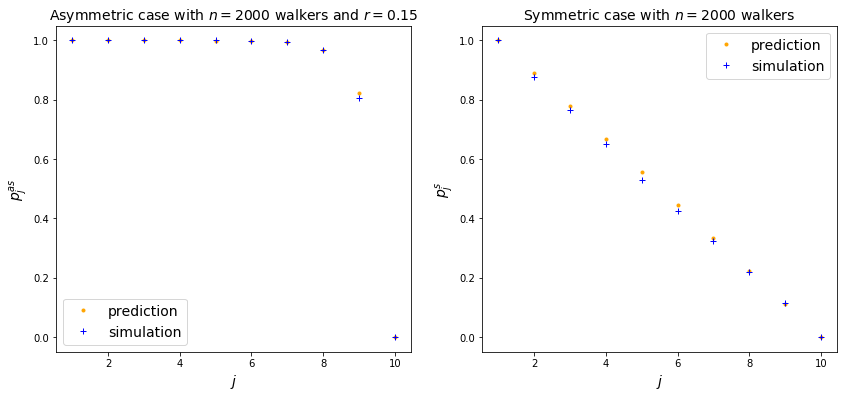

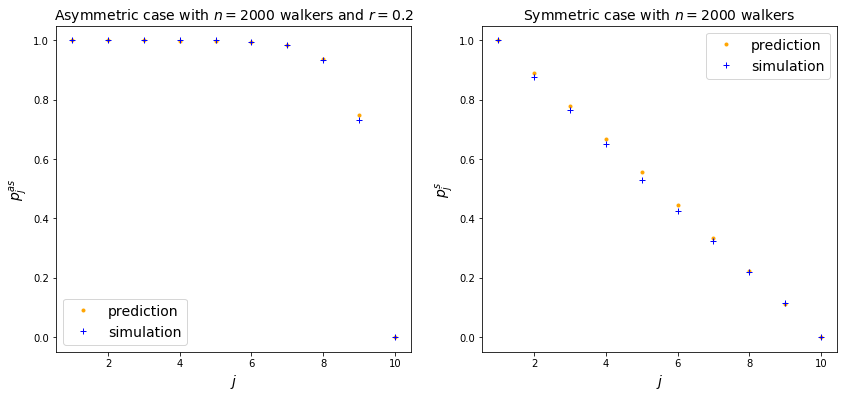

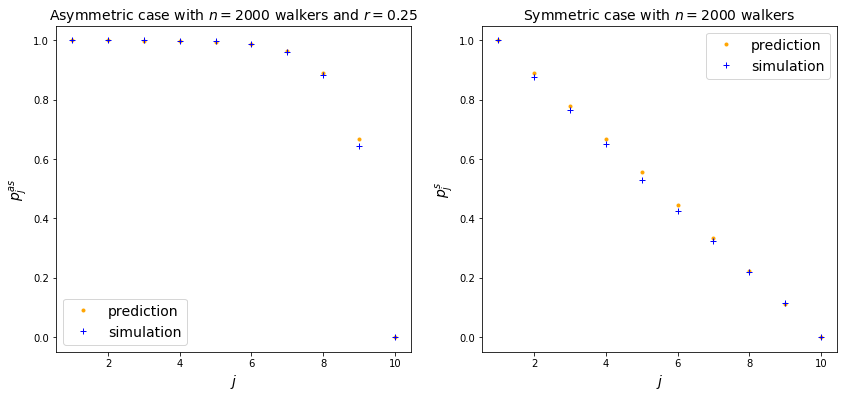

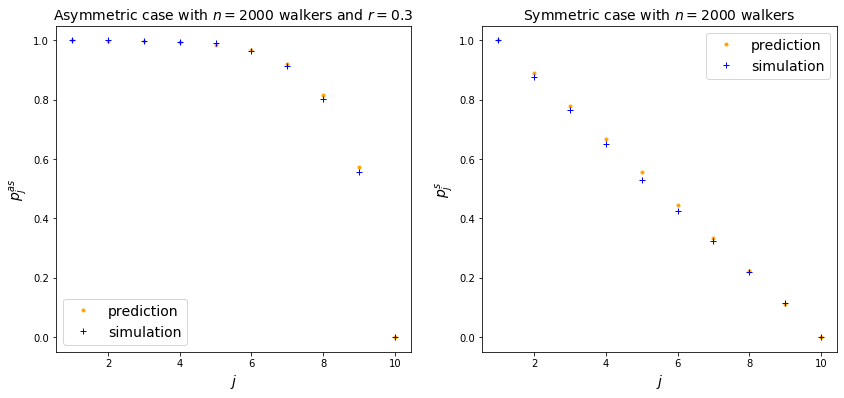

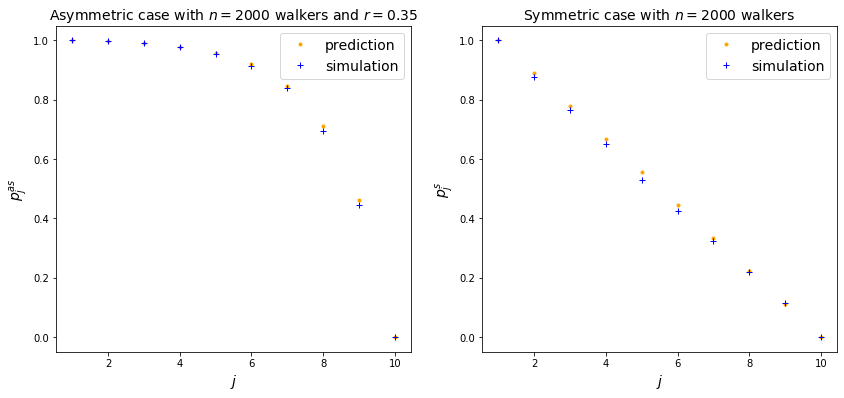

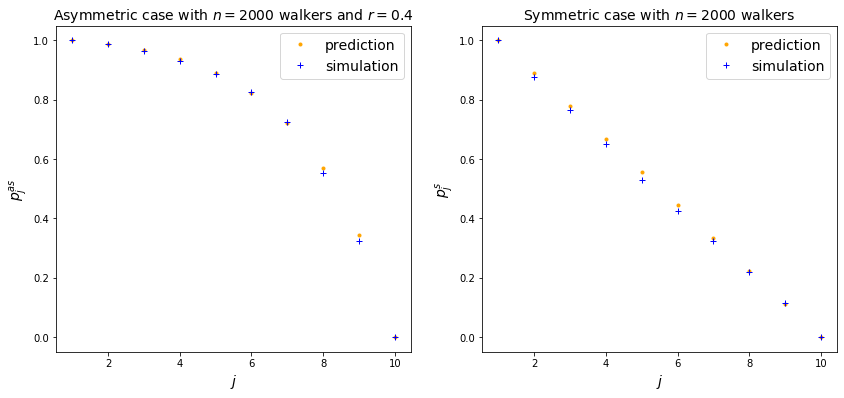

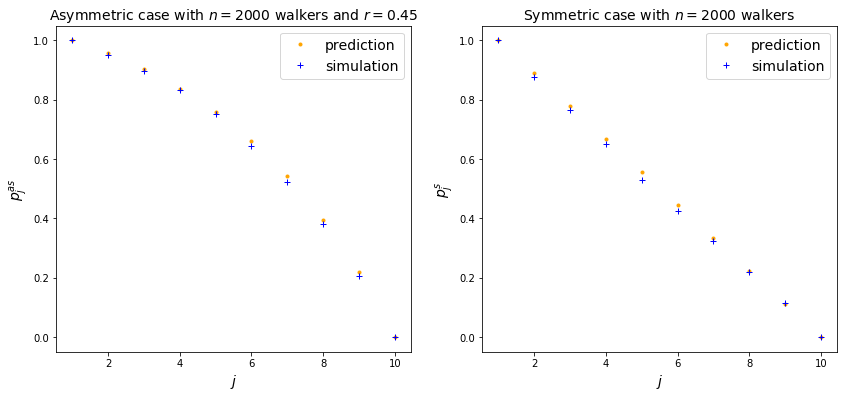

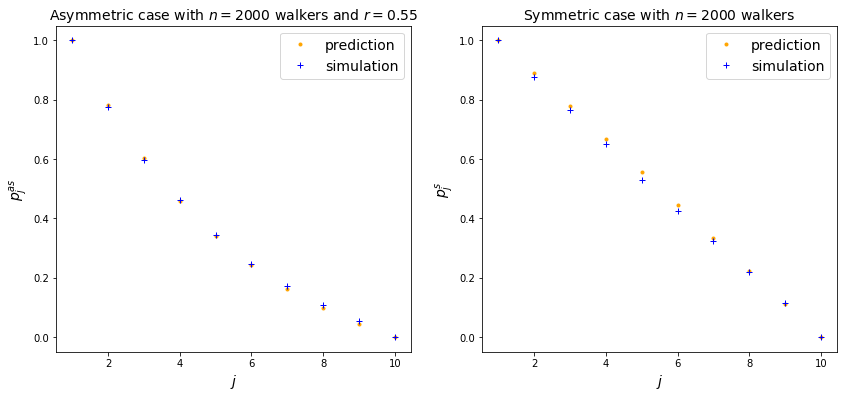

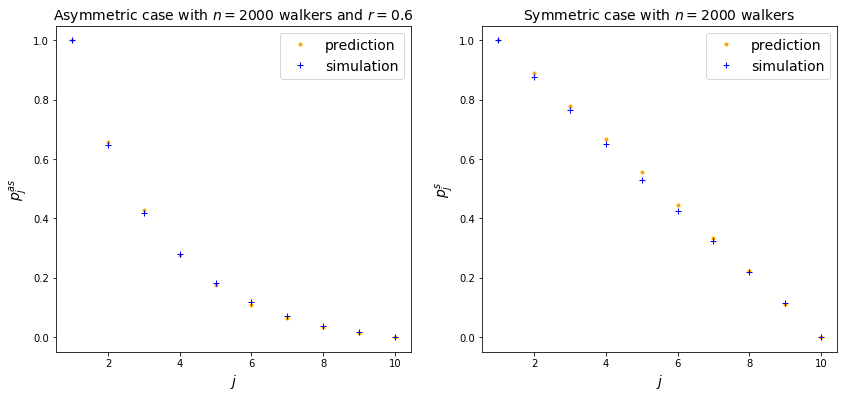

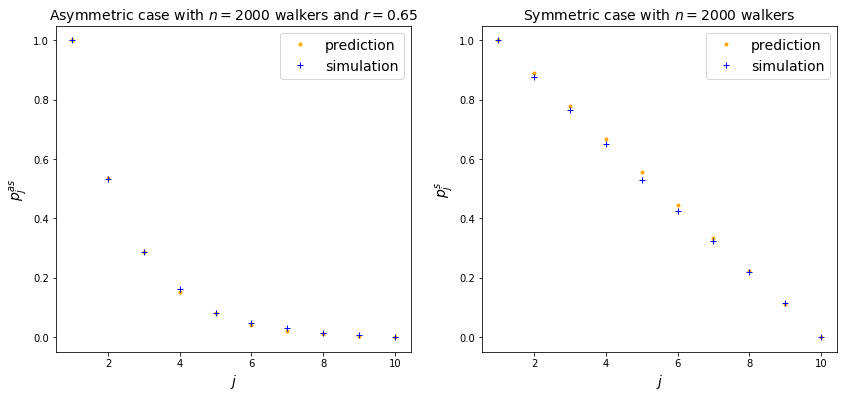

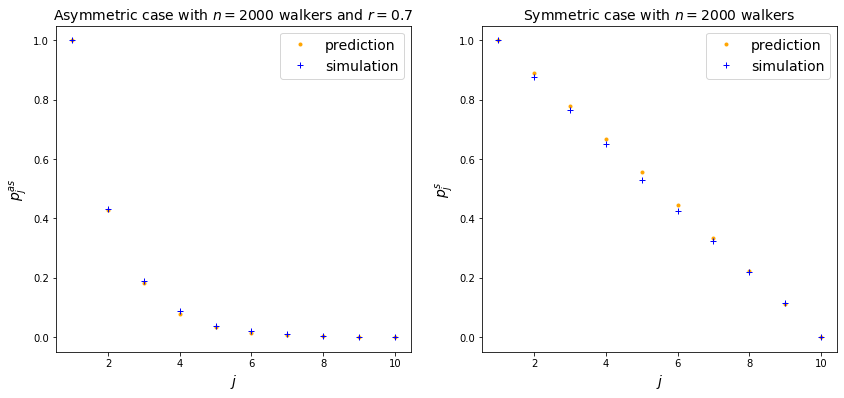

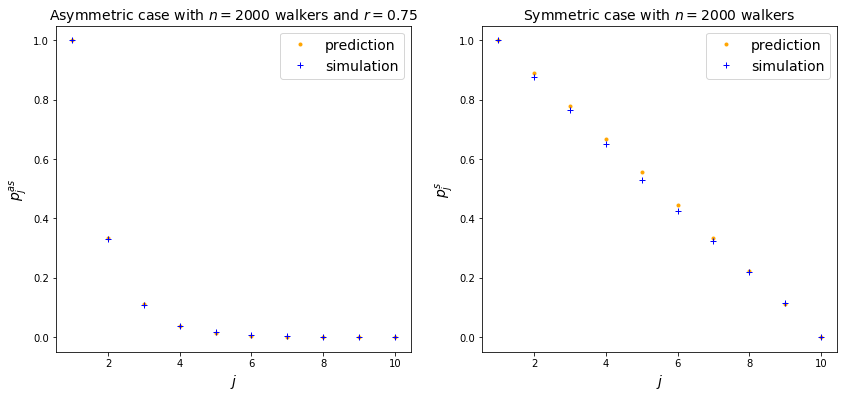

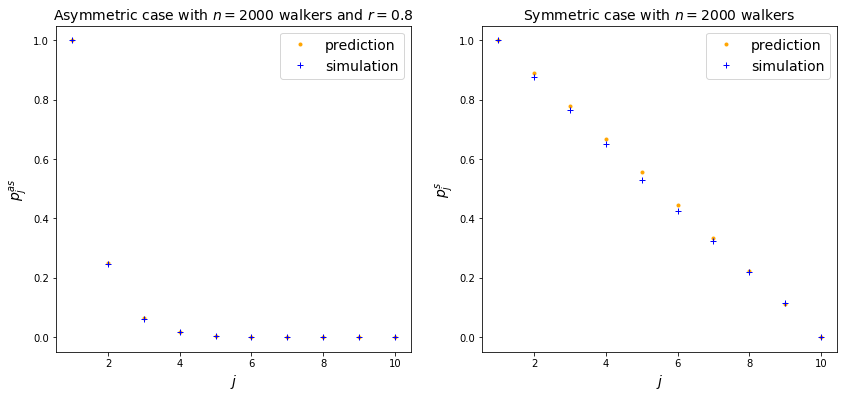

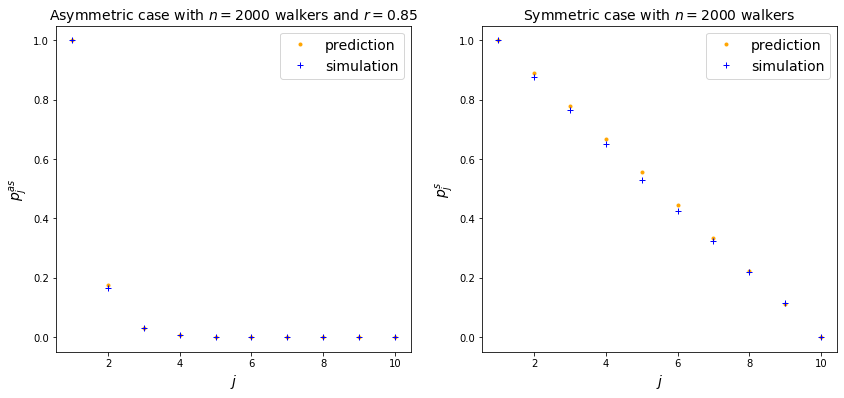

In [13]:
# Case with N = 10

N=10
n=2000
r = np.arange(0.15,0.9,0.05)

for el in r:
    rr = round(el,2) # to have only 2 decimal digits
    if np.isclose(rr,0.5) == True: # avoid symmetric case
        continue
    brw.comparison(rr,N,n,True)

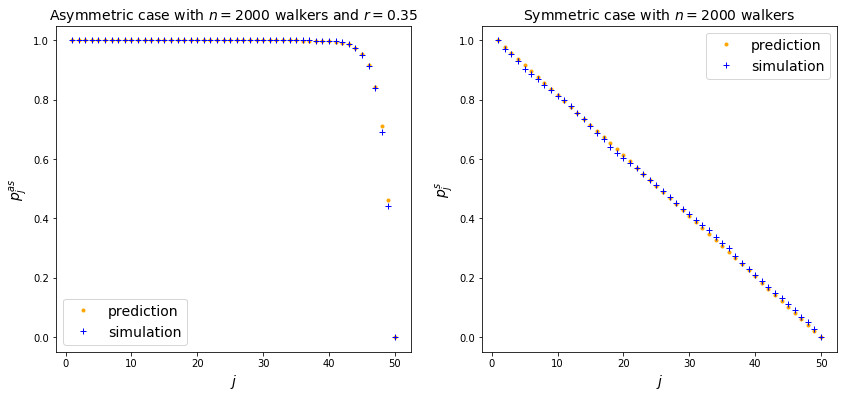

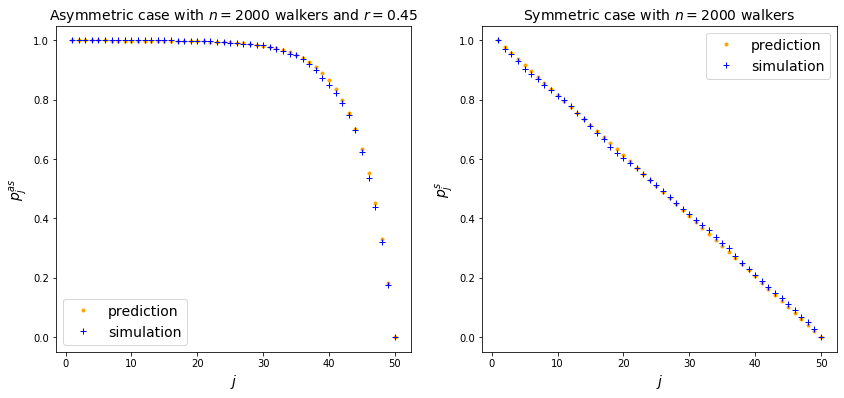

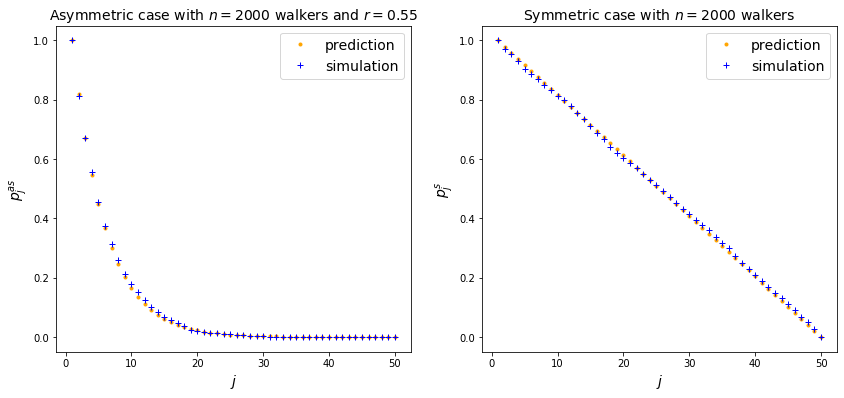

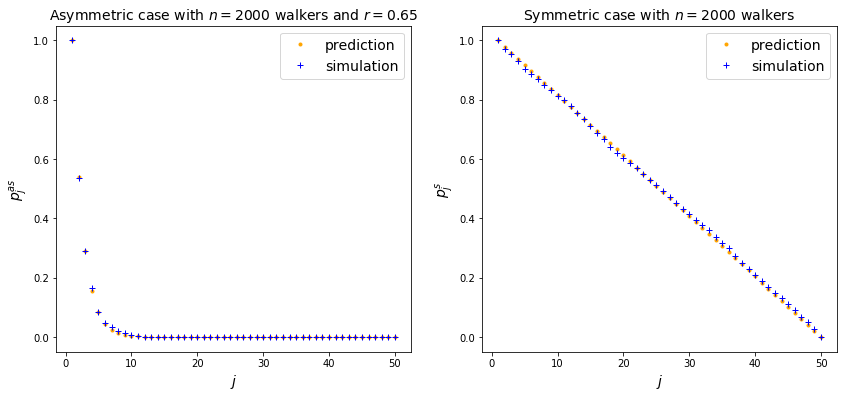

In [14]:
# Case with N = 50 and selected r

N=50
n=2000

for el in [0.35,0.45,0.55,0.65]:
    brw.comparison(el,N,n,True)

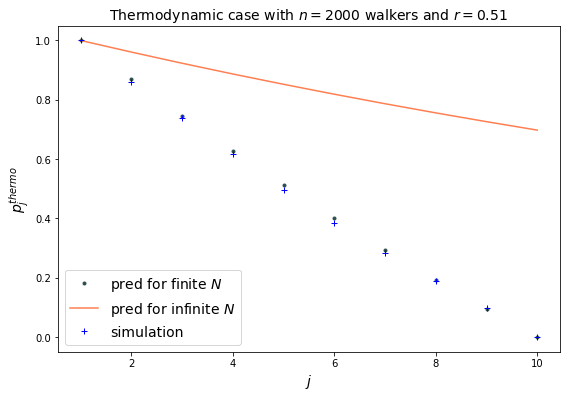

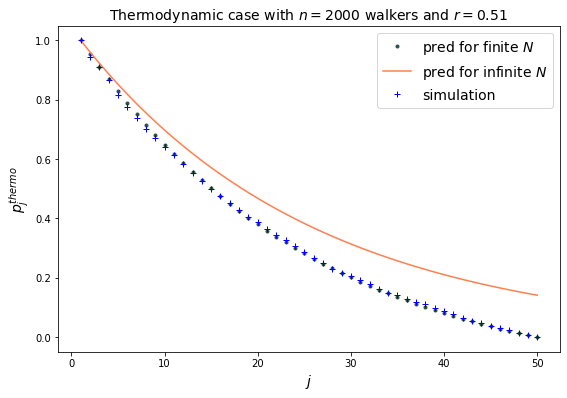

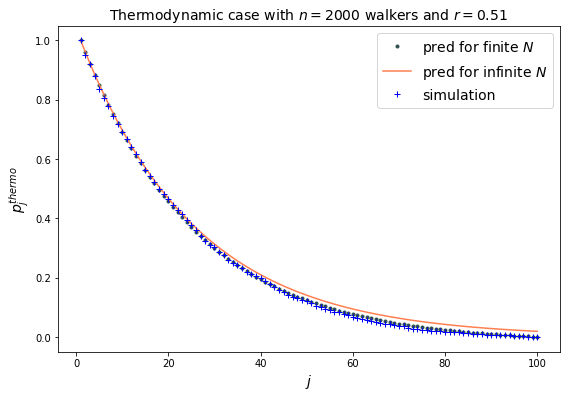

In [4]:
# Case for big N and one fixed r

n=2000

# These values of N are chosen to explicitely how the simulation converge to the 
# theermo limit. Actully this happens quaite naturally with N = 50.
for NN in [10,50,100]:
    brw.comparison_thermo(0.51,NN,n,True)